# ICT 781 - Week 4

# Functions

Programming is inherently repetitive. One of the main goals of writing software is to get the computer to do tasks, often over and over again. A convenient way to complete these repetitive tasks is through defining **functions**. A function has inputs and usually results in an output, or `return` value. A **module** is a collection of functions and variables stored in a script. We've seen modules in the past few lessons, for example, when we use `import math` we are importing the `math` module.

Through the use of functions and modules, your Python programs will often be composed of a few Python scripts interacting with each other.

Here's a few examples of functions.

In [34]:
def hello():
    """ The 'Hello world' function. """
    print('Hello world :)')
    
hello()

Hello world :)


In [35]:
def makeEnthusiastic(word):
    """ Take in a string and add an exclamation point. """
    
    print(word + '!')
    
makeEnthusiastic('This past week was crazy')

This past week was crazy!


In these examples, the function is defined using the `def <function name>` syntax. The parentheses indicate where the function's **arguments** will be passed in. The arguments are the function's inputs. Finally, the function declaration ends with a `:`. After the line declaring the function, we have an indented code block doing some task. In our above examples, the task was printing a string, but functions can do any other tasks.

With this in mind, the general syntax for declaring a function is:

```
    def <function name>(<arguments>):
        <do some task here>
```

# Returning Values with Functions

Of course, we can do more than just print strings with functions. We usually want our functions to actually have some output, or to `return` some value.

## *Example:* The `absolute_value` function

Let's start by defining a mathematical function that gives many people problems. The absolute value function $f(x) = |x|$ takes in a number $x$. If that number is positive, $f(x)$ gives you the number back. If the input $x$ is negative, then $f(x)$ makes it positive in its output. In mathematical terms,
$$
    f(x) = |x| = \begin{cases}
        x, \text{ if } x \geq 0,\\
        -x, \text{ if } x < 0.
    \end{cases}
$$
We can code this function in Python.

In [36]:
def absolute_value(x):
    """ Absolute value function. """
    
    if x >= 0:
        return x
    elif x < 0:
        return -x

Here, our function's name, `absolute_value`, is highlighted in blue, and the argument we will pass the function is `x`. Function declarations end with the `:` symbol.

Within the function, we have the conditions of the absolute value function. We use the `return` command to produce the function's output.

Let's test this function. We know that $|5| = 5$ and that $|-11| = 11$, so let's see if our function gets it right.

In [37]:
absolute_value(5)

5

In [38]:
absolute_value(-11)

11

In the above code, we called the function `absolute_value` by typing the function name with an argument, for example `absolute_value(5)`.

We can also call functions and declare variables based on the function output.

In [39]:
abs5 = absolute_value(5)
abs5

5

# The `return` Command

The `return` command is very much like the `break` command. It immediately exits the function and returns to the main body of the program, giving the `return` value as the function output. 

**Note:** There are conflicting opinions on the use of capital letters in declaring function names. Some programmers prefer to use underscores to separate individual words as I have above (i.e. `absolute_value`). Other programmers like using 'camel-case', which would make our function name `absoluteValue`. Either convention is acceptable, and the style will usually depend on the chosen style of a given programming team.

## *Example* - Returning other values
We can return more than just integers. Here's another example of a function that calculates some key statistics for a dataset and returns several values.

In [40]:
# This dataset, LWRATIO, is a collection of measurements of length-to-width ratios 
# of fossilized humerus bones found in East Africa. The dataset is found in 
# Mendenhall and Sincich (2012), A Second Course in Statistics: Regression Analysis.

data = [10.73,8.48,8.52,8.91,8.93,9.38,8.89,8.71,8.87,11.77,8.80,9.07,9.57,6.23,10.48,10.02,9.20,
        9.29,9.41,10.39,8.38,10.33,9.94,6.66,9.39,11.67,9.98,8.07,9.35,9.17,8.30,9.84,8.37,8.86,
        9.89,9.17,9.59,6.85,9.93,8.17,12.00]

def stats(X, biased = True, msg = ''):
    """ Take in data X and return the mean and variance. """
    
    N = len(X)
    
    # Calculate the mean, we'll call it 'average' to avoid using 'mean'.
    average = sum(X)/N
    
    # Calculate the variance.
    sum_squares = sum([(xi - average)**2 for xi in X])
    
    if biased:
        variance = sum_squares/N
    elif not biased:
        variance = sum_squares/(N-1)
        
    print(msg)
    print('Mean: {:.4f}, Variance: {:.4f}'.format(average, variance))
    return average, variance

avg, var = stats(data, biased = False, msg = 'Sample stats calculated for LWRATIO dataset.')

Sample stats calculated for LWRATIO dataset.
Mean: 9.2576, Variance: 1.4486


In [41]:
avg

9.257560975609756

In [42]:
var

1.448568902439024

This function introduces a few new concepts. First, the function takes in more than one argument. User-defined functions can take in as many arguments as you like. It should be obvious that you only want to pass in arguments that you actually want to use in your functions. 

Another new concept is the default argument for `keywords` given in the function declaration. You can specify an *immutable* as a default argument for your function. This helps in the event that no second argument is passed in to the function. 

Here's an example of calling a function but leaving out the keyworded arguments.

In [43]:
stats(data)


Mean: 9.2576, Variance: 1.4132


(9.257560975609756, 1.4132379535990478)

There are some cases where you will be working on a function and you want to call the function without returning a value. For this, you can use the `pass` keyword. This makes the function do everything it would do normally, but then exit with no output.

In [44]:
def workInProgress(x):
    """ Example of using pass instead of return. """
    
    fact = [x*(x-1) for x in range(0,-x,1)]
    total = sum(fact)
    
    print('This function is not done.')
    
    pass

zero = workInProgress(60)
print(zero)

This function is not done.
None


# Controlling functions with other functions

When you are building Python software, you will most likely be declaring multiple functions and controlling them with some code. A good practice is to break up your code into a collection of functions, with each function accomplishing one specific task. When all of your tasks have corresponding functions, you can write a single function that calls the simple functions in a predetermined order.

Let's see an example of this in practice.

## *Example*: Calculating a restaurant bill
Let's see a collection of functions that work together to calculate a customer's food bill at a restaurant. The customer is presented the bill and then must decide on a tip percentage or amount. The GST is calculated, and then both the GST and the tip are added to the original bill amount.

In [45]:
def add_rate(amount, rate):
    """ Helper function that returns amount*(1 + rate) """
    
    return amount*(1 + rate)

def GST(amount, rate = 0.05):
    """ Calculate GST to add to bill. """
    if amount < 0:
        raise ValueError('{} should be non-negative.'.format(amount))
        
    return add_rate(amount, rate)

def tip(amount, tip_percent = 0.15):
    """ Calculate the amount with a tip added. """
    
    if amount < 0:
        raise ValueError('{} should be non-negative.'.format(amount))
        
    return add_rate(amount, tip_percent)

We'll call these functions inside a `bill()` function and calculate the total bill for a restaurant purchase.

In [46]:
def bill():
    """ Restaurant Bill Calculator. """
    
    print('Thank you for eating at the Python Cafe.\n')
    
    # Get the before-tax bill.
    bill = float(input('Please input bill amount: '))
    
    tip_rate = -1
    
    while tip_rate < 0:
        tip_rate = float(input('Please input tip %: '))
    
    # Adjust if the customer puts in decimal or integer tip percentage.
    if tip_rate % 100 >= 1:
        tip_rate /= 100
    
    total = GST(bill)
    total = tip(total, tip_rate)
    
    print('Your total today is ${:.2f}.'.format(total))
    return total

In [47]:
bill()

Thank you for eating at the Python Cafe.

Please input bill amount: 12
Please input tip %: 42
Your total today is $17.89.


17.892

In [48]:
import module1

In [49]:
module1.__dir__()

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__file__',
 '__cached__',
 '__builtins__',
 'add_rate1',
 'GST1',
 'tip1',
 'bill1']

In [50]:
module1.bill1()

Thank you for eating at the Python Cafe.

Please input bill amount: 72
Please input tip %: 101


NameError: name 'GST' is not defined

# Catching Exceptions

You probably noticed that the last example used some new Python syntax: `raise`. This are used to check inputs, and will be covered in more detail when we talk about testing. However, since it is so useful, let's talk about it now.

Suppose that you have a function that works really well *as long as the user puts in the right arguments*. This last part is key. Users will throw all kinds of invalid arguments into your functions and 'break' your code. While we would like to blame the user for improper use of the code or not reading the documentation, part of the responsibility lies with the programmer. 

You can use exceptions to mitigate some of the code breakage that happens in regular use. Here is an example of using an exception to ensure that only integers are accepted as inputs.

In [ ]:
absolute_value('False')

## *Example:* The factorial function
The factorial function is defined as $n! = n(n-1)(n-2)\cdots 2\cdot 1$. **Note:** $0! = 1$.

In [ ]:
def factorial(n):
    """ The factorial function. """
    
    # Convert to integer if the input is a float.
    if type(n) is type(0.5):
        n = int(n)
    
    # Only accept positive integers.
    if type(n) is not type(1) or n <= 0:
        raise ValueError('Only positive integer inputs are accepted.')
    
    total = 1
    for i in range(1,n+1):
        total *= i
        
    return total
    
print(factorial(6))
print(factorial(-1))

In [ ]:
# The 'raise' command is required to raise a ValueError.

if True:
    ValueError('Can you')

## `try` and `except`

You can also use `try` and `except` to throw exceptions.

In [ ]:
try:
    # Write the code you want to try.
    import TheanoLM
except:
    # Write what happens if an exception is raised.
    print('You need to read the documentation!')
    raise    # raise *any* exceptions that occurred.

In [ ]:
def factorial(n):
    """ The factorial function. """
    try:
        # Only accept positive integers.
        if n <= 0:
            raise ValueError('Only positive integer inputs are accepted.')

        total = 1
        for i in range(1,n+1):    # An exception will be raised if n is a float!
            total *= i

        return total
    except:
        # What to do if *any* exceptions occur.
        raise    # raise the exception (we don't have to specify our own, but we can if we want).
    
print(factorial(5.0))

In [ ]:
while True:
    try:
        amount = input('Please give me input: ')
        
        for i in range(amount):
            print('Hi')
            
        break
    except:
        continue

# Lambda Functions (Anonymous Functions)

Sometimes you just want to calculate something one time on the fly, and you don't want to dedicate a new function declaration to the task. For this, you can use a **Lambda function**. These functions are known as *anonymous*, meaning they aren't given a particular name. They can return values, and can be assigned to any variable.

Here is an example of a Lambda function.

In [ ]:
# I want to make a quick function that squares an integer, but I don't want to declare a new function.

y = -12
f = lambda x : x**2

print(f(y))

The syntax for a `lambda` function is 
```
lambda <argument> : <desired output>
``` 

These functions are often used as arguments for other functions, for example when you don't want to write a function to accomplish some simple task.

We will try to use `lambda` functions to accomplish simple tasks, such as plotting a function in the `Matplotlib` example below.

# Documenting Functions

When we talked about comments, we mentioned **docstrings**. These are the comments that appear immediately after the function declaration statement.

In [ ]:
def myFunction():
    """ These are the docstrings. """
    pass

Within the docstrings, you let the programmer know what your function is called, what its arguments are, and what the function does. 

In [ ]:
def investmentValue(initial, rate, freq, time):
    """ Future Investment Value Function. 
        
        The user inputs the initial value of an
        investment, the interest rate, compounding
        frequency, and the total investment time. 
        The future value of the investment
        is returned.
        
        Input:
        ------
        initial := initial value of the investment
        rate    := interest rate
        freq    := compounding frequency; eg) if compounded quarterly, use n = 4
        time    := total time of the investment (in years)
        
        Output:
        -------
        future_value := future value of the investment
    """
    
    future_value = initial*(1 + rate/freq)**(freq*time)
    return future_value

print('The value of a $10000 investment compounded quarterly\nat 2.5% for 12 years is ${:.2f}.'.format(investmentValue(10000, 0.025, 4, 12)))

The above function doesn't do much, but it is properly documented. The docstrings let the programmer know what's going on, and can be accessed *without seeing the function code* by calling `help(<function name>)`.

In [ ]:
help(investmentValue)

# Some Extremely Useful External Packages/Modules

We've seen glimpses of external packages and modules in this course. We briefly used the `math` module to calculate `sin` and `cos`. We used `random` to get a random number in Assignment 1. There are thousands of programmer-defined packages available to Python users. Let's discuss some of the most commonly used.

## NumPy

The name stands for Numerical Python, and NumPy is the defacto Python standard for numerical calculations in many STEM fields. This package is built around some very fast numerical linear algebra solvers that were first developed in the 1970s in Fortran and C. NumPy can handle matrix algebra, trigonometry and logarithms, complex numbers, basic statistics, and special functions such as the gamma function.

You can import the package with a single command.

In [ ]:
import numpy as np

# Let's see what is contained in NumPy.
print(np.__dir__())

In [ ]:
help(np.hanning)

## MatPlotlib.pyplot

This is the fundamental plotting library for Python. In the next example, we'll plot some mathematical functions. I realize that not everybody is interested in plotting mathematical functions, but you may be surprised at how useful this package is for many other tasks.

In addition, MatPlotlib works beautifully with NumPy. Here's an example of plotting some simple functions.

In [ ]:
%matplotlib inline
# The previous command is just so the plots display in this Jupyter notebook.

import matplotlib.pyplot as plt

# Create 301 evenly spaced points between 0 and 2pi.
x = np.linspace(0, 2*np.pi, 301)

# Functions to plot.
f1 = np.sin(x)
f2 = np.cos(x)
f3 = np.cos(2*x)

# Plot all functions on the same axes.
# Set axis limits [x_min, x_max, y_min, y_max]
plt.xlim(0,2*np.pi)
plt.ylim(-1,1)

# Plot the functions in different colors. 'r' = red, 'b' = blue, 'k' = black.
plt.plot(x, f1, 'r', x, f2, 'b', x, f3, 'k');

In [ ]:
# Set plot options.
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=1, wspace=1)

""" Create 3 subplots. 
    First argument := number of rows in grid
    Second argument := number of columns in grid
    Third argument := position of current subplot (positions are labelled left to right, top to bottom)
    
"""

plt.subplot(3,1,1)
plt.title('Sine Function')
plt.plot(x,f1);

plt.subplot(3,1,2)
plt.title('Cosine Function')
plt.plot(x,f2);

plt.subplot(3,1,3)
plt.title('Cos(2x) Function')
plt.plot(x,f3);

In [ ]:
x = np.linspace(0, 5, 500)

f = lambda x: (x-3)**3

plt.plot(x, f(x));

You can also make histograms with MatPlotlib and NumPy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(X, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True);

## *Example 4*: Random walk

In this example, we'll calculate and plot a random walk in 2 dimensions. We'll store our data in a NumPy `array`, which is roughly equivalent to a `list` containing only one data type.

In our random walk, we'll start a 'particle' at the point $t = 0, y = 0$, where $t$ will be eventually be plotted on the horizontal axis and $y$ will be plotted on the vertical axis. Each time we increase $t$, we will either move our particle up or down one unit with equal probability. After 500 steps, we'll plot the result.

In [ ]:
import random

def move():
    """ Return either +1 or -1 with equal probability. """
    
    space = [1,-1]
    
    return random.choice(space)

def plot_walk(walk):
    """ Plots the path taken by a particle on a random walk. """
    
    plt.plot(walk);
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Random walk of particle with $t$ = {}'.format(len(walk)))
    plt.grid(True);
    
def random_walk(steps = 500):
    """ Send a particle on a random walk with a total of 'steps' iterations. """
    
    walk = np.zeros(steps)
    
    # Take the walk!
    for t in range(1, steps):
        walk[t] = walk[t-1] + move()
    
    plot_walk(walk)
    
    return None

random_walk()

## Installing Packages and the Python Packaging Index (PyPI)

As mentioned above, there are thousands of available packages for all kinds of applications. You can find some of the best packages at the [Python Packaging Index](https://pypi.org). These packages can usually be installed from the terminal using the command `pip install <package-name> --user`. The `--user` option is used where you don't have administrative priviledges to install things.

Here is an example of the output when we try to install NumPy.

In [ ]:
!pip install numpy --user

We already knew that we had NumPy installed. Let's try another package.

In [ ]:
!pip install TheanoLM --user

## Installing Packages in Anaconda

Using Anaconda makes this process even easier. Simply open the Anaconda Navigator and click on 'Environments'. This gives a list of installed packages, update-able packages, and packages not installed. If you want to install a package, you select it from the list of packages not installed and click 'Apply'.

## *Exercises*

1. Write a function that takes in two arguments, a list and a value. Your function should return `True` if the value is in the list and `False` if not. Such functions are often called 'characteristic' or 'indicator' functions.

In [ ]:
# Your code here.
def checkList(value_list, value):
    return(value in value_list)

In [ ]:
value_list = [1, 3, 6, 8, 4]
print(checkList(value_list, 31))

2. Write a function called `standardize` that takes in a dataset (as a list) and applies the standardization:

$$
    z_i = \frac{(x_i - \bar{x})}{\sqrt{\sigma}},
$$
where $x_i$ is an element of the dataset, $\bar{x}$ is the mean of the dataset, and $\sigma$ is the variance of the dataset. Return the $z_i$ values in a list. You can use the LWRATIO data from above.

In [ ]:
def standardize(value):
    
    xbar, variance = stats(value)
    
    z = [(xi-xbar)/variance**0.5 for xi in value]
    
    return z

value = [2,3,4]
print(standardize(value))

3. Modify the 'Restaurant Bill Calculator' code above to allow the customer to specify if they want to apply the tip before or after the GST. You can also add an option for the customer to specify the tip as a percentage or as an amount.

In [ ]:
# Your code here


4. Write a function to convert between Fahrenheit and Celsius temperatures. The formula for converting &deg;C to &deg;F is $T_F = T_C\cdot \frac{9}{5} + 32$. The formula to convert &deg;F to &deg;C is $T_C = (T_F - 32)\cdot\frac{5}{9}$.

In [ ]:
# Your code here.
def temp_conv(temp,scale):
    c2f = lambda t: t*9/5+32
    f2c = lambda t: (t-32)*5/9
    
    if scale.upper() == 'F':
        return f2c(temp)
    else:
        return c2f(temp)
    
print(temp_conv(212,'F'))
print(temp_conv(0,'c'))

5. Modify the *Random walk* example so that the particle moves up twice as often as it moves down.

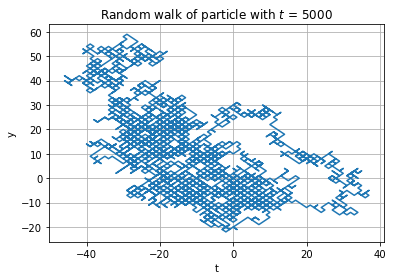

In [70]:
import random

random.seed(10)

def move():
    """ Return either +1 or -1 with equal probability. """
    
    return 1 if random.random() < 0.5 else -1

def plot_walk(x_walk, y_walk):
    """ Plots the path taken by a particle on a random walk. """
    
    plt.plot(x_walk, y_walk);
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Random walk of particle with $t$ = {}'.format(len(x_walk)))
    plt.grid(True);
    
def random_walk(steps = 500):
    """ Send a particle on a random walk with a total of 'steps' iterations. """
    
    x_walk = np.zeros(steps)
    y_walk = np.zeros(steps)
    
    # Take the walk!
    for t in range(1, steps):
        x_walk[t] = x_walk[t-1] + move()
        y_walk[t] = y_walk[t-1] + move()
        
    
    plot_walk(x_walk, y_walk)
    
    return None

random_walk(5000)

6. Collect all of the functions we've defined so far into a single `.py` document. Call the document `day4functions.py`. Save the file to the same folder as this notebook and import the module using the syntax `import day4functions`. Run all of the functions in the module.

In [ ]:
# Your code here.
